<a href="https://colab.research.google.com/github/khalifazada/misc_projects/blob/master/BTCUSD_Price_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BTCUSD Price Analysis

NOTE: Upgrade all packages, then restart runtime to verify all packages have been upgraded.

## Upgrading packages

In [0]:
!python --version

Python 3.6.7


In [0]:
!pip3 install seaborn --upgrade

    100% |████████████████████████████████| 215kB 25.3MB/s 
  Found existing installation: seaborn 0.7.1
    Uninstalling seaborn-0.7.1:
      Successfully uninstalled seaborn-0.7.1


In [0]:
!pip install matplotlib --upgrade

    100% |████████████████████████████████| 12.9MB 2.7MB/s 
    100% |████████████████████████████████| 952kB 20.1MB/s 
yellowbrick 0.9 has requirement matplotlib<3.0,>=1.5.1, but you'll have matplotlib 3.0.2 which is incompatible.
  Found existing installation: matplotlib 2.1.2
    Uninstalling matplotlib-2.1.2:
      Successfully uninstalled matplotlib-2.1.2


NOTE: Restart runtime at this point

## Preparing data

In [0]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os

print(tf.__version__)
print(sns.__version__)
print(matplotlib.__version__)

%matplotlib inline
sns.set()

1.12.0
0.9.0
3.0.2


In [0]:
# read data

from google.colab import drive

drive.mount('/Drive/')
filepath = '/Drive/My Drive/Projects/Notebooks/datasets/BTCUSD60.csv'

df = pd.read_csv(filepath, header=None)
df = df.iloc[:,2:]
df.columns = ['open', 'high', 'low', 'close', 'volume']
print(df.head())

Drive already mounted at /Drive/; to attempt to forcibly remount, call drive.mount("/Drive/", force_remount=True).
     open    high     low   close  volume
0  8285.5  8304.5  8257.5  8280.0     401
1  8280.0  8368.0  8265.5  8266.0     697
2  8265.5  8382.5  8261.5  8331.5     904
3  8331.5  8394.0  8314.0  8344.5     962
4  8345.0  8370.5  8309.0  8358.5     778


In [0]:
df.describe()

,open,high,low,close,volume
count,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000
mean,6264.252928,6287.596734,6239.345967,6263.436642,595.607371
std,1237.926163,1236.652266,1239.421213,1238.099090,576.462162
min,3139.300000,3151.800000,3120.800000,3138.300000,2.000000
25%,6215.825000,6236.747500,6195.810000,6216.142500,169.000000
50%,6436.900000,6456.055000,6422.900000,6437.300000,464.000000
75%,6828.717500,6854.417500,6789.032500,6825.632500,859.000000
max,8550.500000,8606.000000,8513.500000,8550.500000,6493.000000


Check for NaNs.

In [0]:
# NaN rows

df[pd.isnull(df).any(axis=1)]

,open,high,low,close,volume


In [0]:
# remove NaNs

df.dropna(axis=0, inplace=True)
print(df.tail())
print("\nDataframe length: {}".format(len(df)))

        open    high     low   close  volume
5313  3737.3  3737.3  3680.8  3704.8     793
5314  3704.3  3739.3  3684.8  3734.3     658
5315  3735.3  3754.8  3718.8  3735.8     637
5316  3736.3  3809.8  3736.3  3774.3    1066
5317  3774.8  3790.8  3757.8  3782.8     450

Dataframe length: 5318


In [0]:
# range column

df['range'] = df['high'] - df['low']
print(df['range'].head())

0     47.0
1    102.5
2    121.0
3     80.0
4     61.5
Name: range, dtype: float64


In [0]:
# create signed_range

s = (df['close'] - df['open']) < 0

df['signed_range'] = df['range'] * ((-1) ** s)

print(df['signed_range'].head())

0    -47.0
1   -102.5
2    121.0
3     80.0
4     61.5
Name: signed_range, dtype: float64


In [0]:
# summarize

df = df[['open', 'high', 'low', 'close', 'volume', 'range', 'signed_range']]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5318 entries, 0 to 5317
Data columns (total 7 columns):
open            5318 non-null float64
high            5318 non-null float64
low             5318 non-null float64
close           5318 non-null float64
volume          5318 non-null int64
range           5318 non-null float64
signed_range    5318 non-null float64
dtypes: float64(6), int64(1)
memory usage: 332.4 KB


## Visualizing data

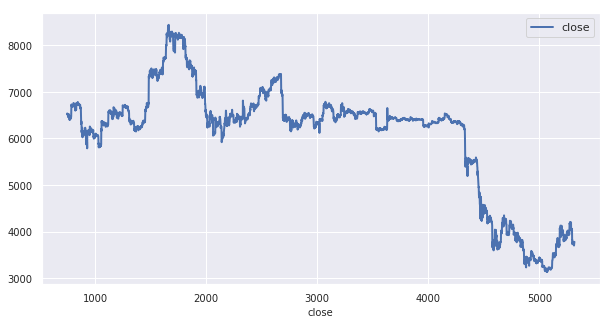

In [0]:
# plot close

df[['close']][750:].plot(figsize=(10,5), linewidth=2, fontsize=10)
plt.xlabel('close', fontsize=10);

Text(0.5, 0, 'volume')

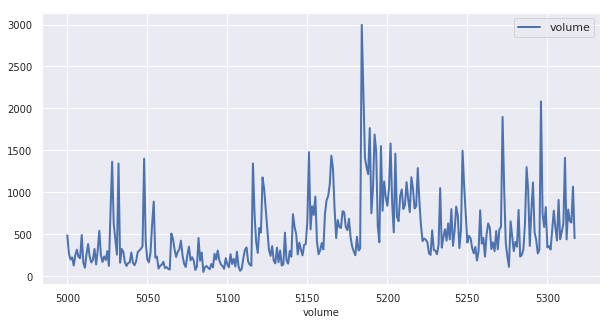

In [0]:
# plot volume

df[['volume']][5000:].plot(figsize=(10,5), linewidth=2, fontsize=10)
plt.xlabel('volume', fontsize=10)

Text(0.5, 0, 'signed range')

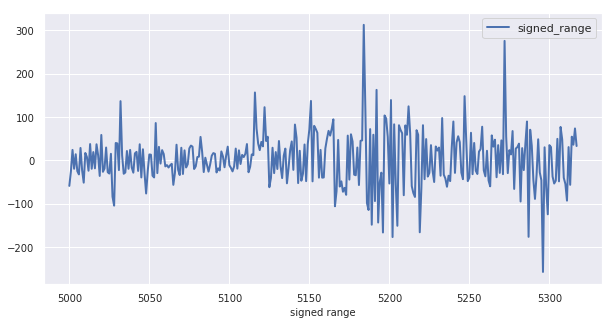

In [0]:
# plot range

df[['signed_range']][5000:].plot(figsize=(10,5), linewidth=2, fontsize=10)
plt.xlabel('signed range', fontsize=10)

In [0]:
# create logreturns

df['close_logreturn'] = np.log(df['close']) - np.log(df['close'].shift(1))
df['range_logreturn'] = np.log(df['range']) - np.log(df['range'].shift(1))
df.fillna(value=0, inplace=True)
print(df.head())

     open    high     low   close  volume  range  signed_range  \
0  8285.5  8304.5  8257.5  8280.0     401   47.0         -47.0   
1  8280.0  8368.0  8265.5  8266.0     697  102.5        -102.5   
2  8265.5  8382.5  8261.5  8331.5     904  121.0         121.0   
3  8331.5  8394.0  8314.0  8344.5     962   80.0          80.0   
4  8345.0  8370.5  8309.0  8358.5     778   61.5          61.5   

   close_logreturn  range_logreturn  
0         0.000000         0.000000  
1        -0.001692         0.779715  
2         0.007893         0.165928  
3         0.001559        -0.413764  
4         0.001676        -0.262989  


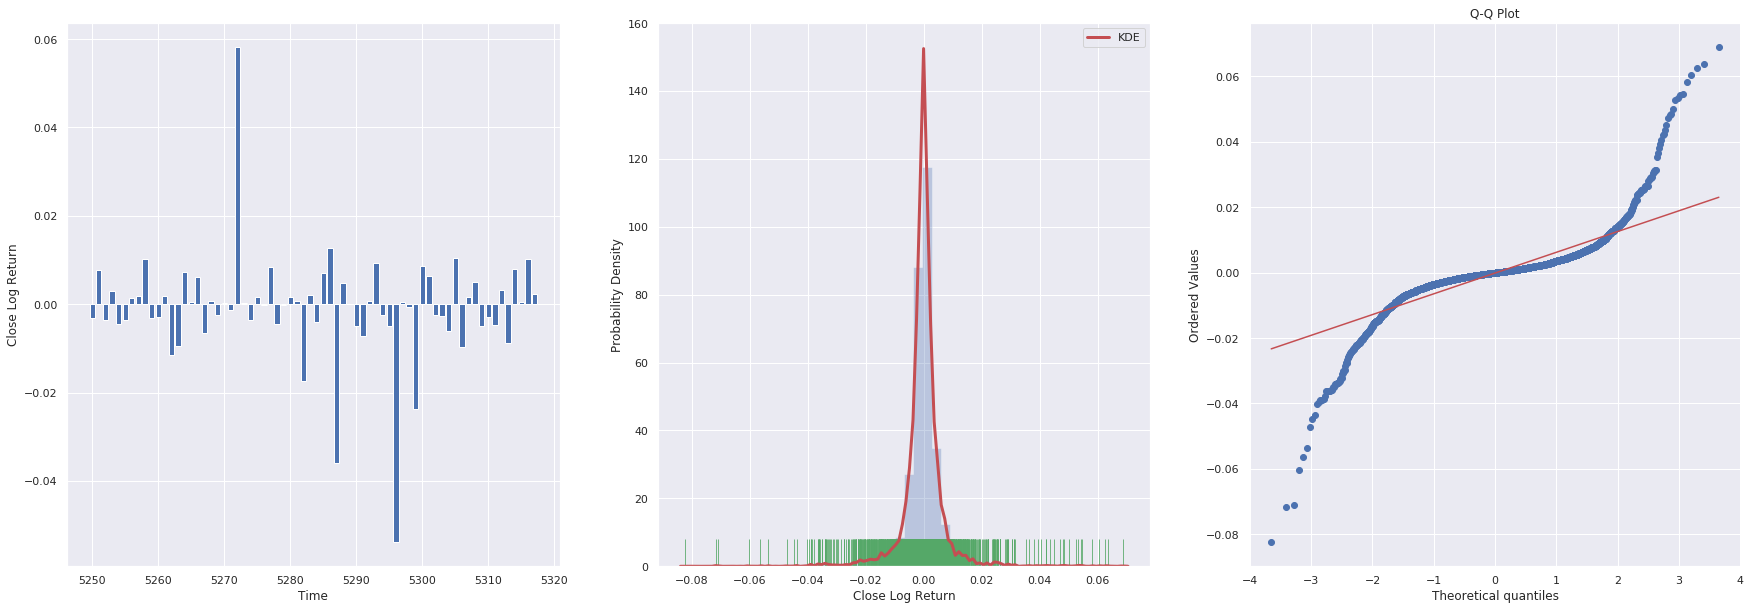

In [0]:
# plot close_logreturn

from scipy import stats

n = 5250

fig = plt.figure(figsize=(30, 10))
ax = fig.add_subplot(131)
ax.bar(np.arange(n, len(df), 1), df['close_logreturn'][n:])
ax.set_ylabel('Close Log Return')
ax.set_xlabel('Time')

ax1 = fig.add_subplot(132)
sns.distplot(df['close_logreturn'], hist=True, kde=True, rug=True, bins=48, norm_hist=True,
              rug_kws={"color": "g", 'alpha': 0.8},
              kde_kws={"color": "r", "lw": 3, "label": "KDE"},
              hist_kws={"histtype": "stepfilled", "alpha": 0.3, "color": "b"})
ax1.set_ylabel('Probability Density')
ax1.set_xlabel('Close Log Return')

ax2 = fig.add_subplot(133)
stats.probplot(df['close_logreturn'], plot=plt)
ax2.set_title('Q-Q Plot')

plt.show()

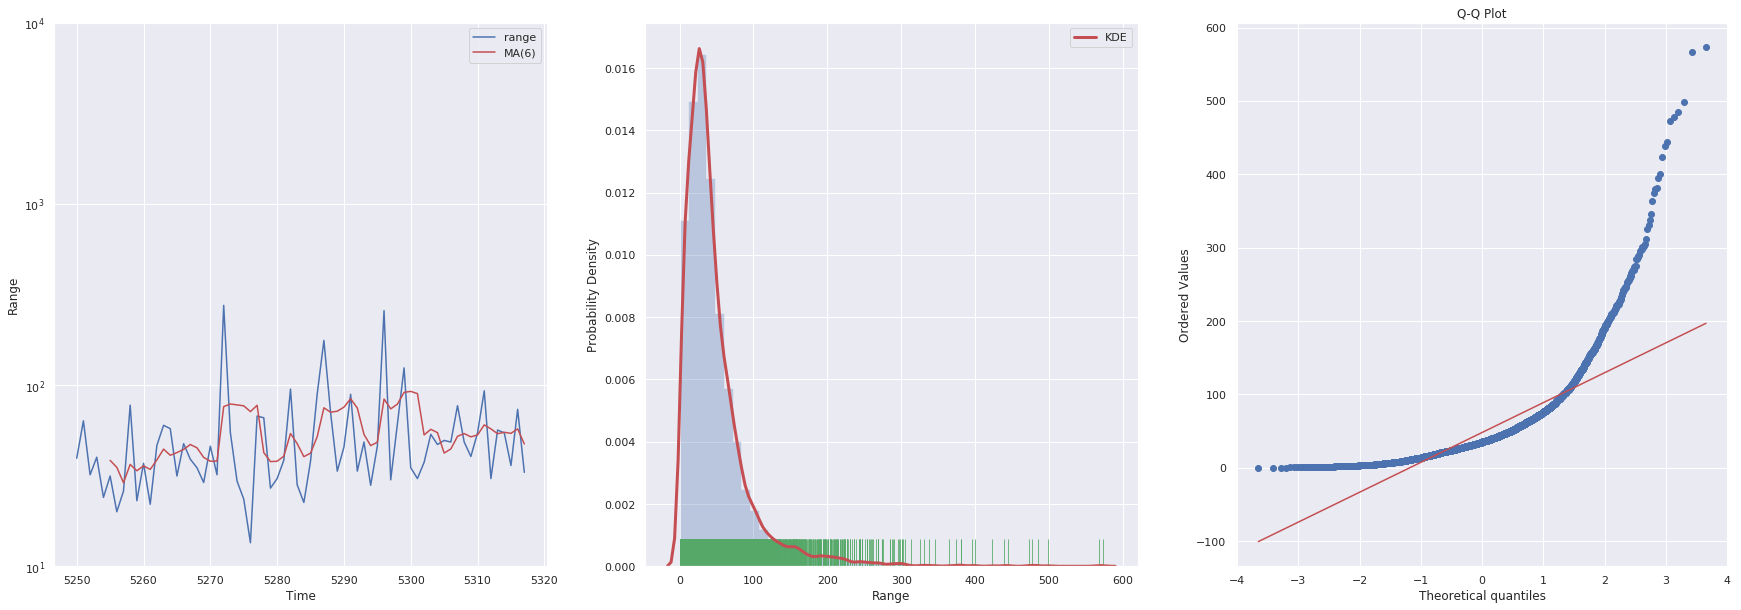

In [0]:
# plot range

n = 5250
m = 6

x = np.arange(n, len(df), 1)
y = df['range'][n:]
ym = y.rolling(m).mean()

fig = plt.figure(figsize=(30, 10))
ax = fig.add_subplot(131)
ax.plot(x, y, c='b')
ax.plot(x, ym, c='r')
ax.set_ylabel('Range')
ax.set_xlabel('Time')
ax.set_yscale('log')
ax.set_yticks([10, 100, 10 ** 3, 10 ** 4])
ax.legend(['range', 'MA({})'.format(m)])

ax1 = fig.add_subplot(132)
sns.distplot(df['range'], hist=True, kde=True, rug=True, bins=48, norm_hist=True,
              rug_kws={"color": "g", 'alpha': 0.8},
              kde_kws={"color": "r", "lw": 3, "label": "KDE"},
              hist_kws={"histtype": "stepfilled", "alpha": 0.3, "color": "b"})
ax1.set_ylabel('Probability Density')
ax1.set_xlabel('Range')

ax2 = fig.add_subplot(133)
stats.probplot(df['range'], plot=plt)
ax2.set_title('Q-Q Plot')

plt.show()

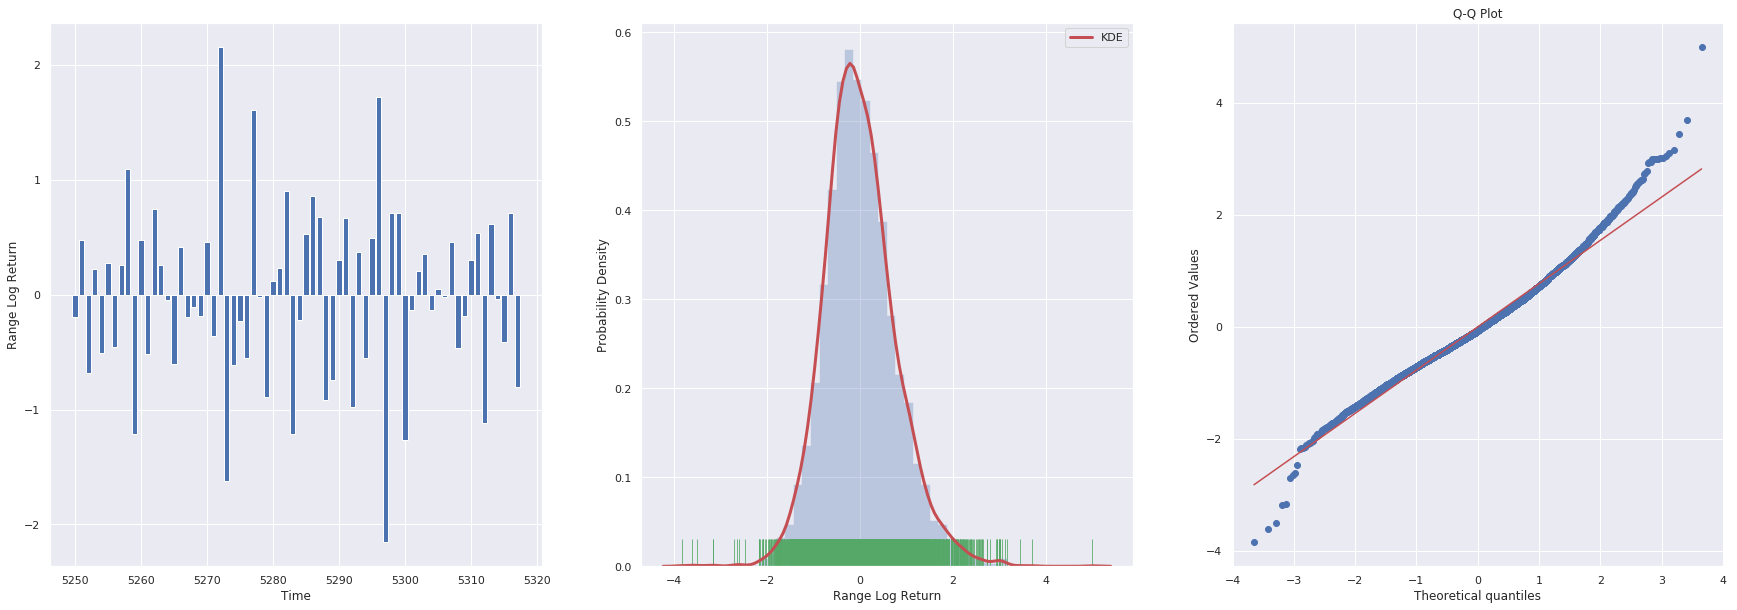

In [0]:
# plot range_logreturn

n = 5250

fig = plt.figure(figsize=(30, 10))
ax = fig.add_subplot(131)
ax.bar(np.arange(n, len(df), 1), df['range_logreturn'][n:])
ax.set_ylabel('Range Log Return')
ax.set_xlabel('Time')

ax1 = fig.add_subplot(132)
sns.distplot(df['range_logreturn'], hist=True, kde=True, rug=True, bins=48, norm_hist=True,
              rug_kws={"color": "g", 'alpha': 0.8},
              kde_kws={"color": "r", "lw": 3, "label": "KDE"},
              hist_kws={"histtype": "stepfilled", "alpha": 0.3, "color": "b"})
ax1.set_ylabel('Probability Density')
ax1.set_xlabel('Range Log Return')

ax2 = fig.add_subplot(133)
stats.probplot(df['range_logreturn'], plot=plt)
ax2.set_title('Q-Q Plot')

plt.show()

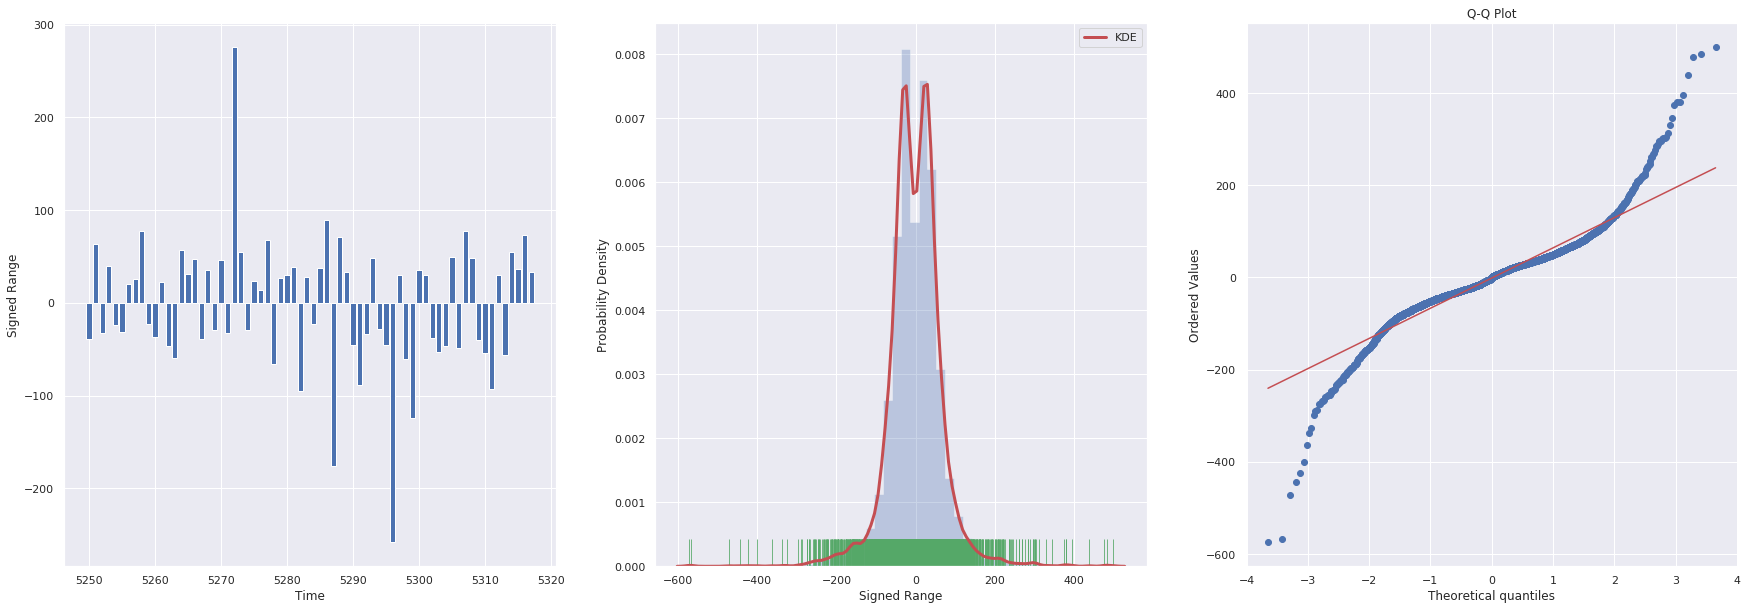

In [0]:
# plot signed_range

n = 5250

fig = plt.figure(figsize=(30, 10))
ax = fig.add_subplot(131)
ax.bar(np.arange(n, len(df), 1), df['signed_range'][n:])
ax.set_ylabel('Signed Range')
ax.set_xlabel('Time')

ax1 = fig.add_subplot(132)
sns.distplot(df['signed_range'], hist=True, kde=True, rug=True, bins=48, norm_hist=True,
              rug_kws={"color": "g", 'alpha': 0.8},
              kde_kws={"color": "r", "lw": 3, "label": "KDE"},
              hist_kws={"histtype": "stepfilled", "alpha": 0.3, "color": "b"})
ax1.set_ylabel('Probability Density')
ax1.set_xlabel('Signed Range')

ax2 = fig.add_subplot(133)
stats.probplot(df['signed_range'], plot=plt)
ax2.set_title('Q-Q Plot')

plt.show()

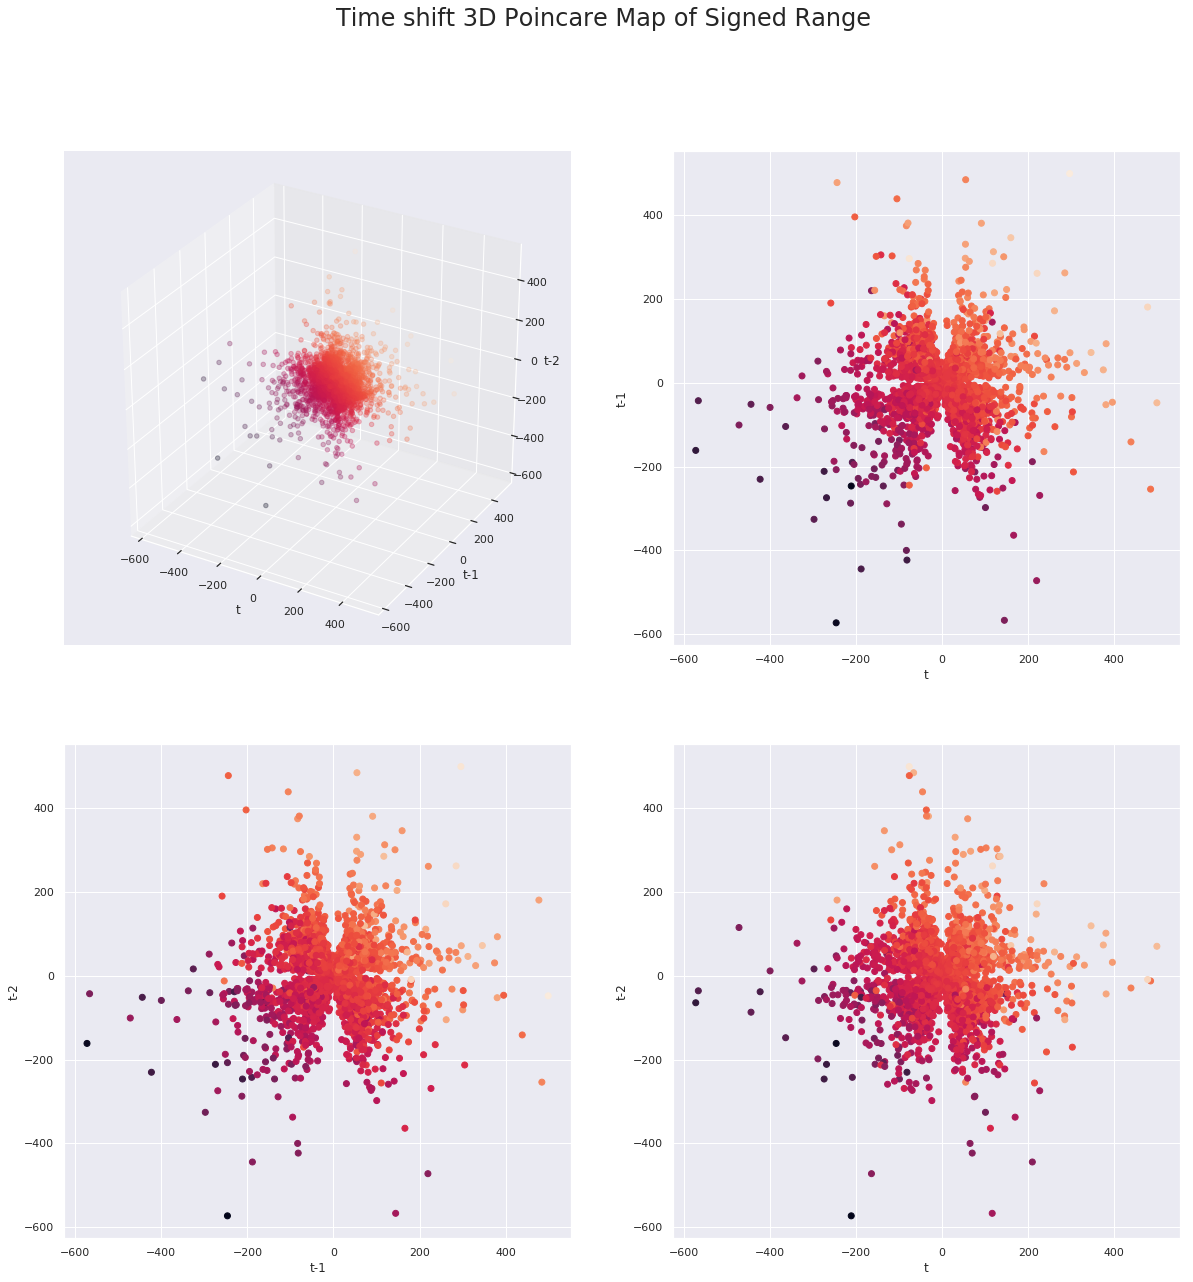

In [0]:
# 3D Poincare plot

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(221, projection='3d')

xs = df['signed_range'][3:]
ys = df['signed_range'].shift(1)[3:]
zs = df['signed_range'].shift(2)[3:]

ax.set_xlabel('t')
ax.set_ylabel('t-1')
ax.set_zlabel('t-2')

c = xs + ys + zs

ax.scatter(xs, ys, zs, c=c, alpha=0.3)

ax1 = fig.add_subplot(222)
ax1.scatter(xs, ys, c=c)
ax1.set_xlabel('t')
ax1.set_ylabel('t-1')

ax2 = fig.add_subplot(223)
ax2.scatter(ys, zs, c=c)
ax2.set_xlabel('t-1')
ax2.set_ylabel('t-2')

ax3 = fig.add_subplot(224)
ax3.scatter(xs, zs, c=c)
ax3.set_xlabel('t')
ax3.set_ylabel('t-2')

fig.suptitle('Time shift 3D Poincare Map of Signed Range', fontsize=24)

plt.show()


xs: 5315, ys: 5315, zs: 5315


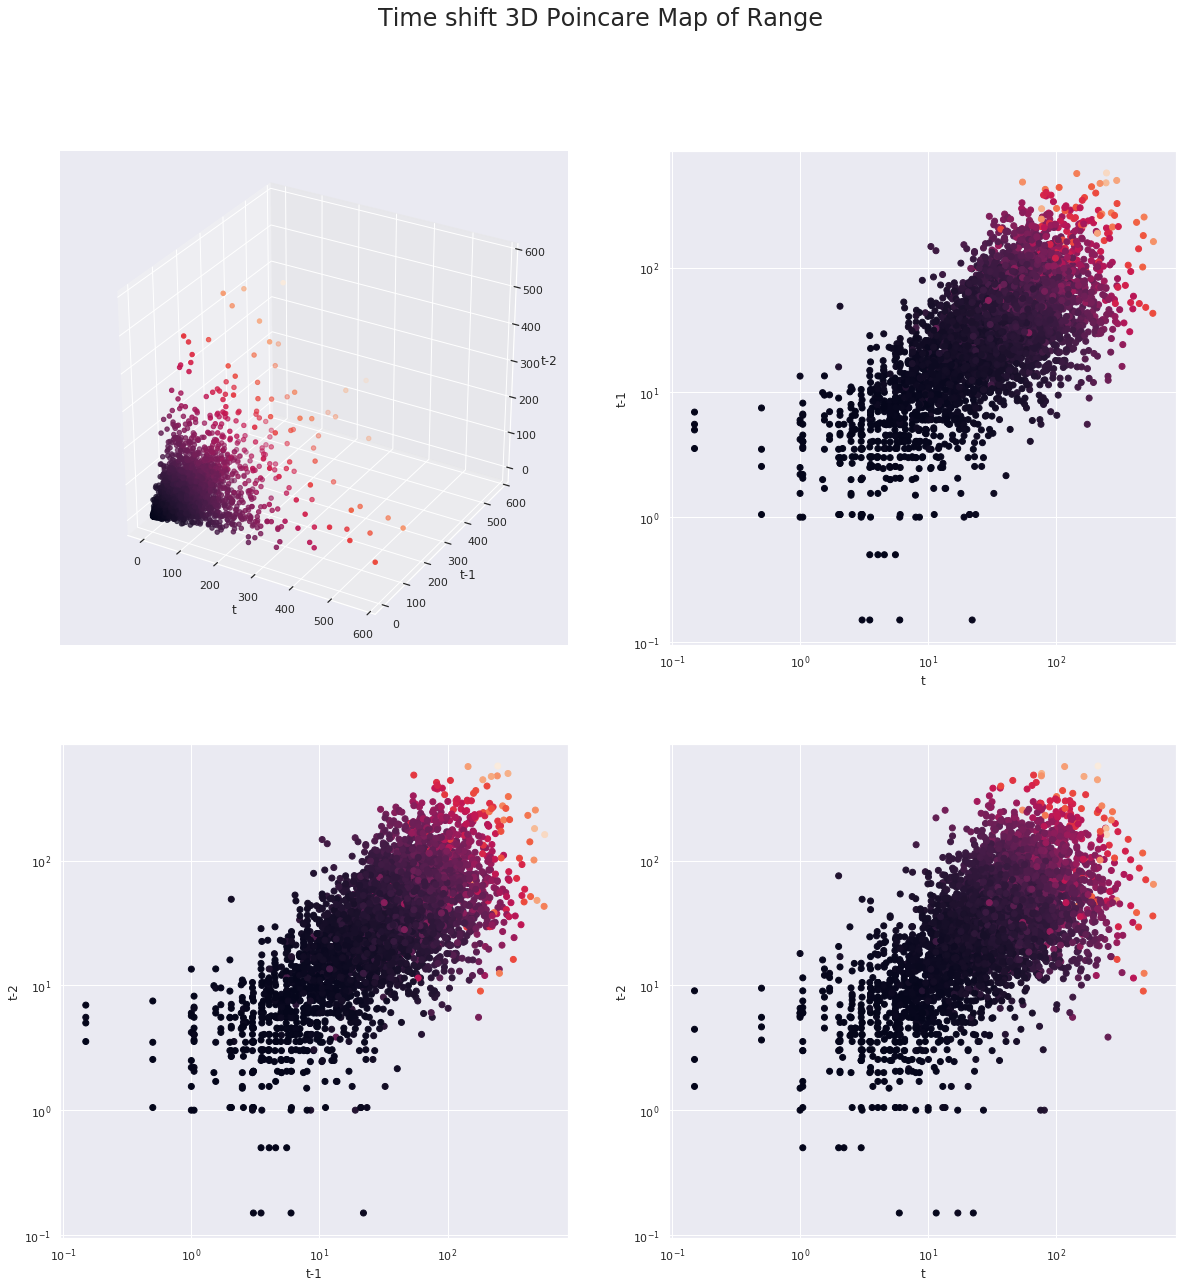

In [0]:
# 3D Poincare plot

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(221, projection='3d')

xs = df['range'][3:]
ys = df['range'].shift(1)[3:]
zs = df['range'].shift(2)[3:]

print('xs: {p0}, ys: {p1}, zs: {p2}'.format(p0=len(xs), p1=len(ys), p2=len(zs)))

ax.set_xlabel('t')
ax.set_ylabel('t-1')
ax.set_zlabel('t-2')

c = xs + ys + zs

ax.scatter(xs, ys, zs, c=c)

ax1 = fig.add_subplot(222)
ax1.scatter(xs, ys, c=c)
ax1.set_xlabel('t')
ax1.set_ylabel('t-1')
ax1.set_xscale('log')
ax1.set_yscale('log')

ax2 = fig.add_subplot(223)
ax2.scatter(ys, zs, c=c)
ax2.set_xlabel('t-1')
ax2.set_ylabel('t-2')
ax2.set_xscale('log')
ax2.set_yscale('log')

ax3 = fig.add_subplot(224)
ax3.scatter(xs, zs, c=c)
ax3.set_xlabel('t')
ax3.set_ylabel('t-2')
ax3.set_xscale('log')
ax3.set_yscale('log')

fig.suptitle('Time shift 3D Poincare Map of Range', fontsize=24)

plt.show()


Range seems to show positive correlation however the dispersion is insane. Variance is very heteroskedastic. 

xl: 5316, yl: 5316


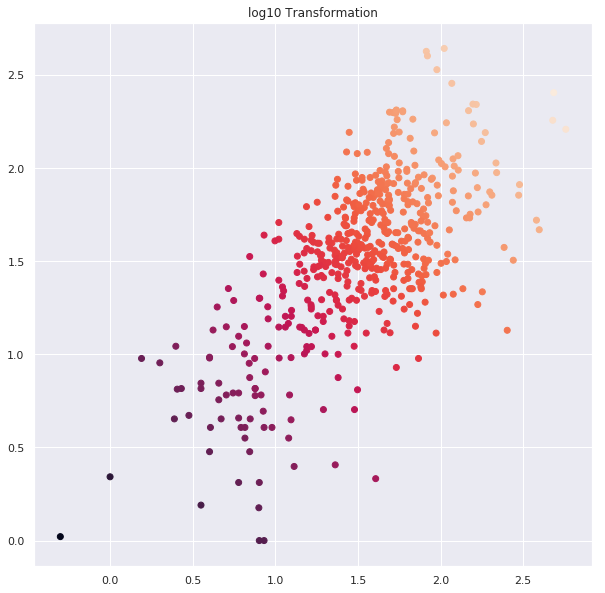

In [0]:
# log transformation

n = 10

xl = df['range'][2:].apply(lambda x: np.log10(x))
yl = df['range'].shift(1)[2:].apply(lambda x: np.log10(x))

print('xl: {p0}, yl: {p1}'.format(p0=len(xl), p1=len(yl)))

c = xl + yl

f = plt.figure(figsize=(10,10))
a = f.add_subplot(111)
a.scatter(xl.iloc[::n], yl.iloc[::n], c=c.iloc[::n])
a.set_xscale('linear')
a.set_yscale('linear')
a.set_title('log10 Transformation')

plt.show()

xsq: 5316, ysq: 5316


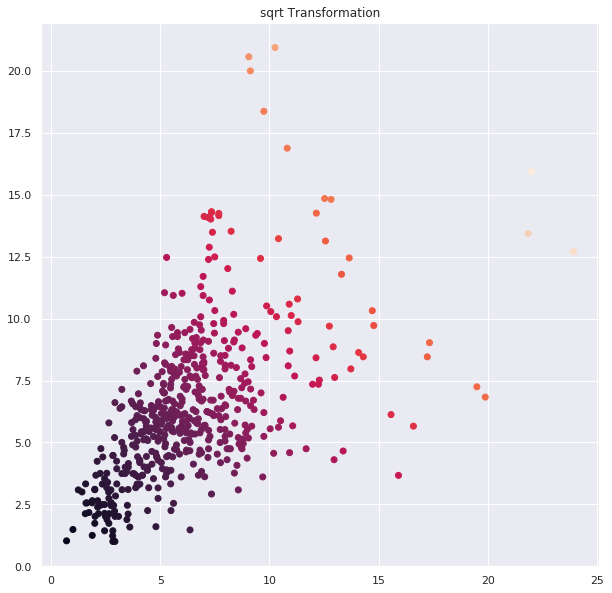

In [0]:
# sqrt transformation

n = 10

xsq = df['range'][2:].apply(lambda x: np.sqrt(x))
ysq = df['range'].shift(1)[2:].apply(lambda x: np.sqrt(x))

print('xsq: {p0}, ysq: {p1}'.format(p0=len(xsq), p1=len(ysq)))

c = xsq + ysq

f = plt.figure(figsize=(10,10))
a = f.add_subplot(111)
a.scatter(xsq.iloc[::n], ysq.iloc[::n], c=c.iloc[::n])
a.set_xscale('linear')
a.set_yscale('linear')
a.set_title('sqrt Transformation')

plt.show()

Seems like $\log_{10}{(X_t)}$ transformation works better to get rid of heteroskedasticity in variance.

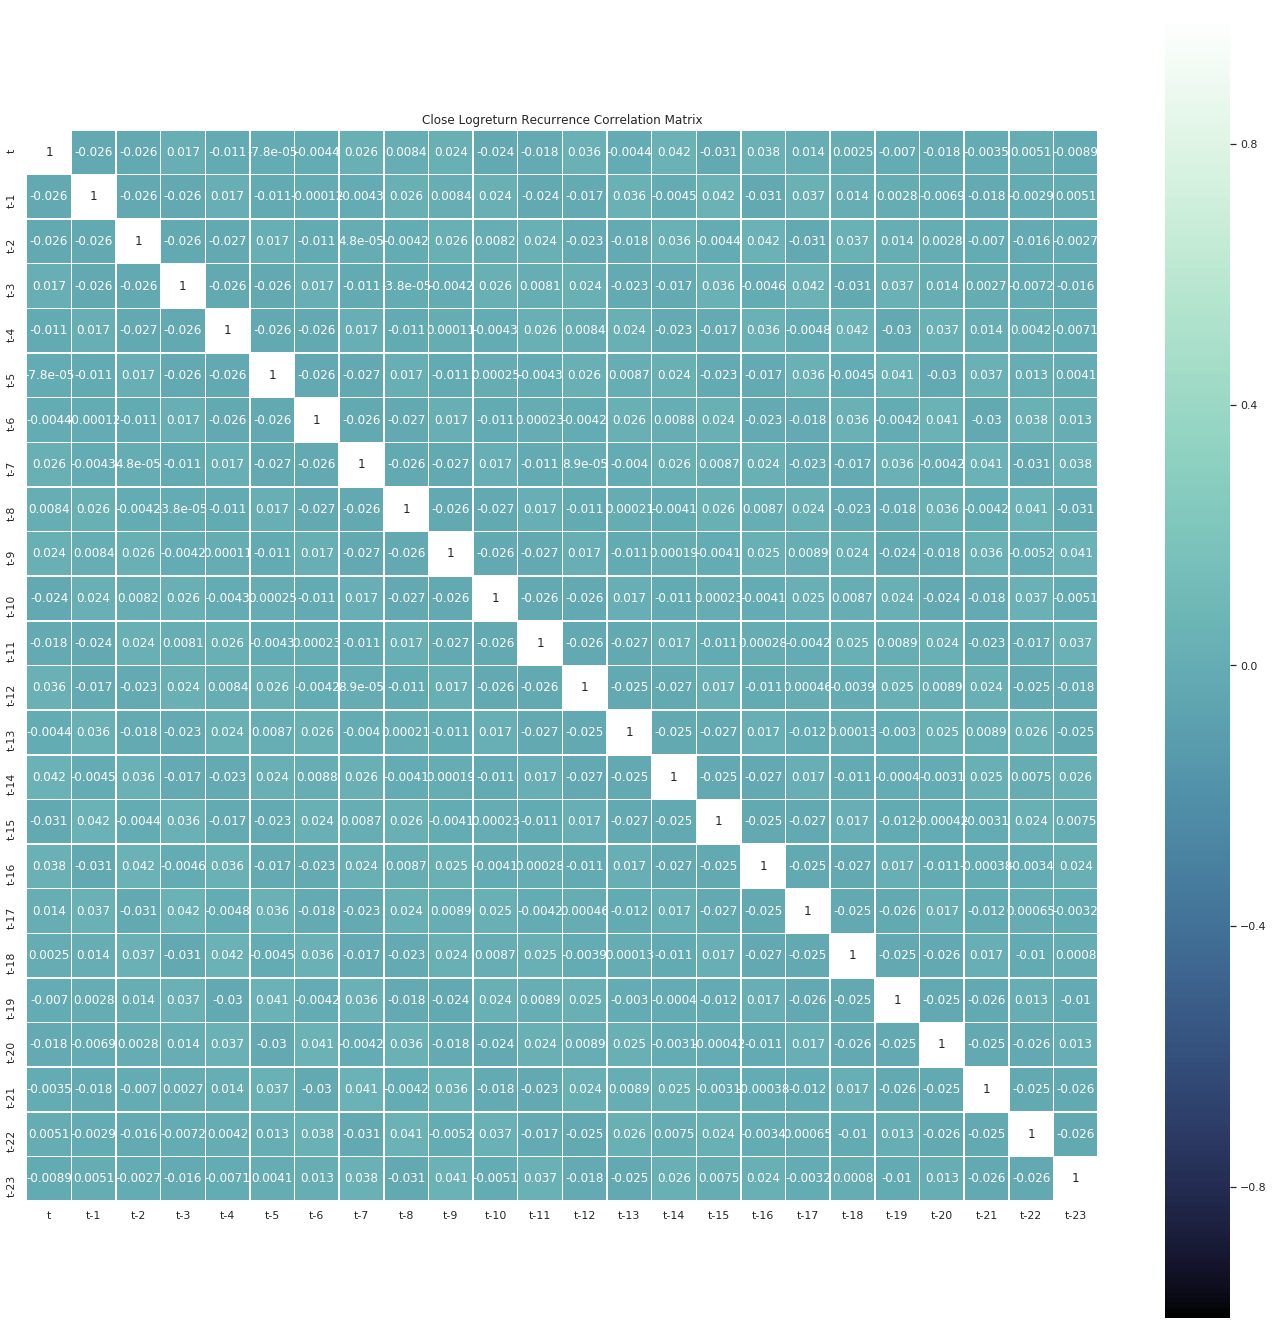

In [0]:
# recurrence correlations

n = 24

df_close = {'t': df['close_logreturn']}

df_close = pd.DataFrame(df_close)

for i in np.arange(1, n, 1):
  df_close['t-{}'.format(i)] = df['close_logreturn'].shift(i)

df_close = pd.DataFrame(df_close)[n:].reset_index(drop=True)

corr = df_close.corr()

fig = plt.figure(figsize=(n,n))
ax = fig.add_subplot(111)
ax.set_title('Close Logreturn Recurrence Correlation Matrix')
cmap = sns.cubehelix_palette(as_cmap=True, hue=1, rot=-0.35, light=1, dark=0, gamma=0.75, reverse=True)
sns.heatmap(data=corr, ax=ax, cmap=cmap, vmax=1, vmin=-1, center=0, annot=True,
            square=True, linewidths=.5)

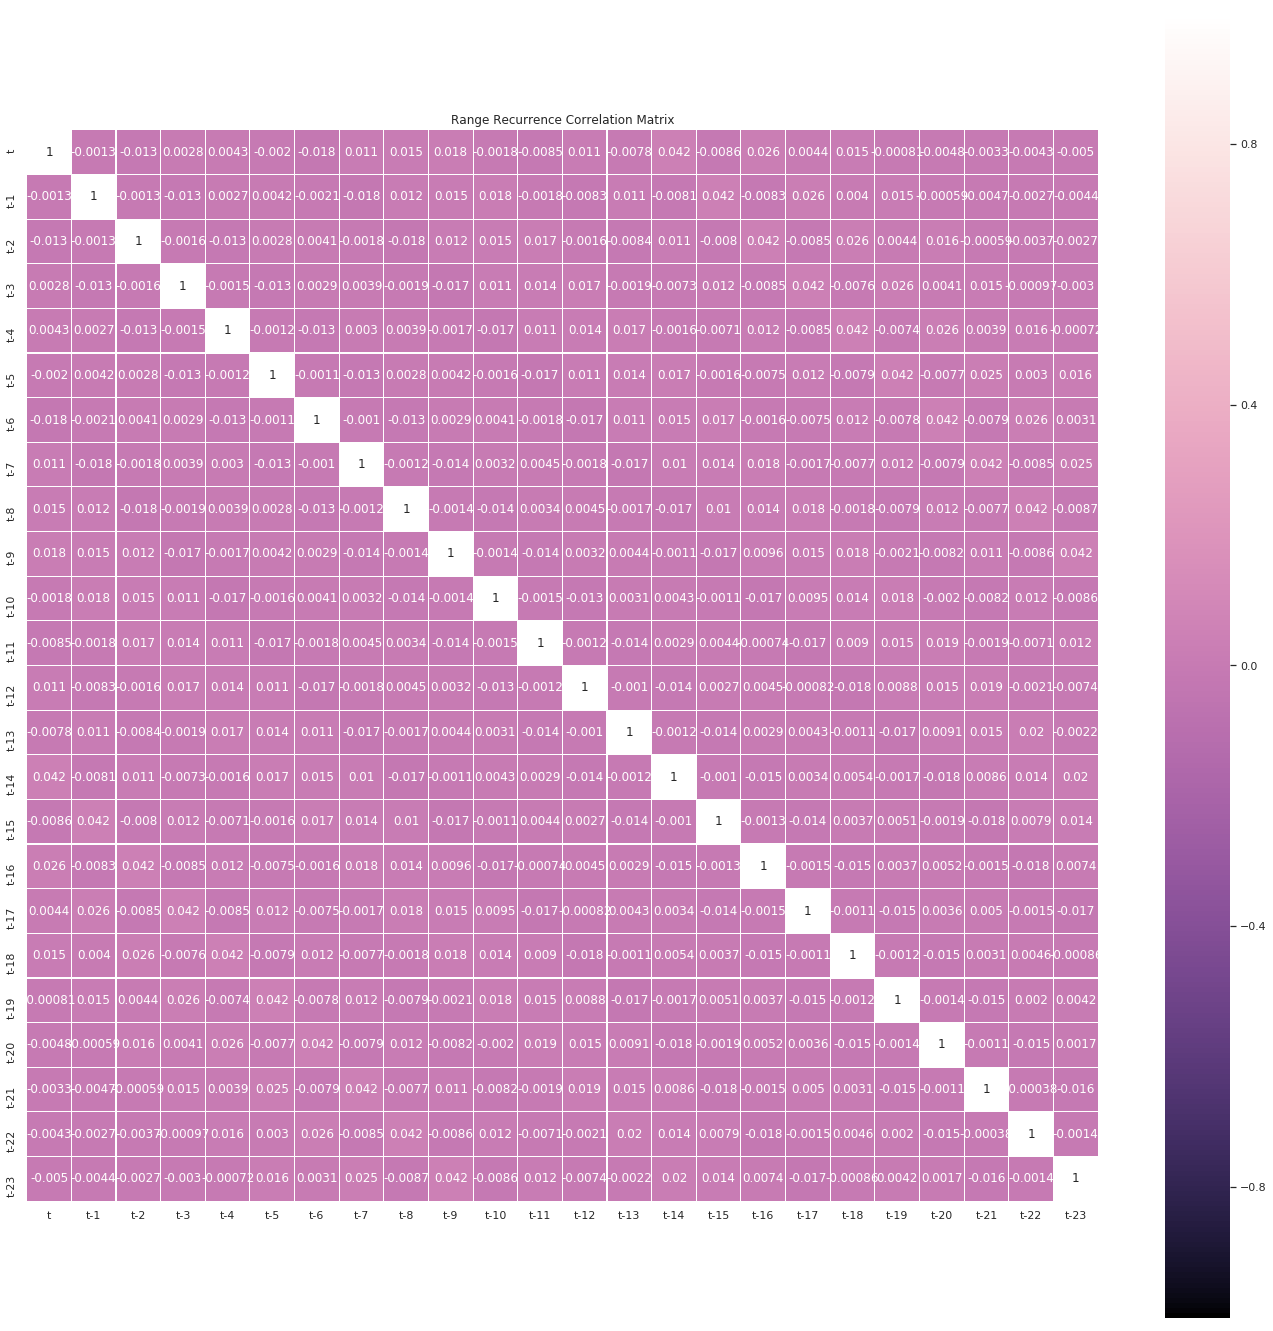

In [0]:
# recurrence correlations

df_range = {'t': df['signed_range']}
df_range = pd.DataFrame(df_range)

for i in np.arange(1, n, 1):
  df_range['t-{}'.format(i)] = df['signed_range'].shift(i)

df_range = pd.DataFrame(df_range)[n:].reset_index(drop=True)

range_corr = df_range.corr()

fig = plt.figure(figsize=(n,n))
ax = fig.add_subplot(111)
ax.set_title('Range Recurrence Correlation Matrix')
cmap = sns.cubehelix_palette(as_cmap=True, hue=1, rot=0.35, light=1, dark=0, gamma=0.75, reverse=True)
sns.heatmap(data=range_corr, ax=ax, cmap=cmap, vmax=1, vmin=-1, center=0, annot=True,
            square=True, linewidths=.1)

Correlation Matrix:            range    volume
range   1.000000  0.745144
volume  0.745144  1.000000


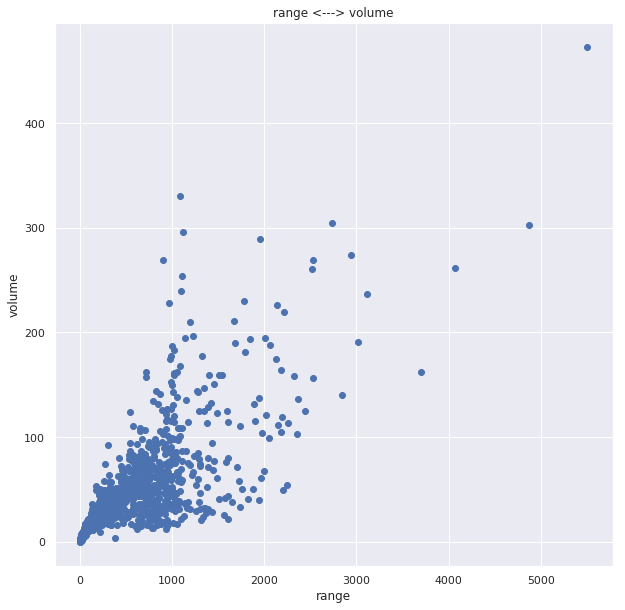

In [0]:
# range-volume correlation

n = 5

range_vol_corr = df[['range', 'volume']].corr()
print("Correlation Matrix: {}".format(range_vol_corr))

f, a = plt.subplots(figsize=(10,10))
a.scatter(df['volume'][::n], df['range'][::n])
a.set_xlabel('range')
a.set_ylabel('volume')
a.set_title('range <---> volume')
plt.show()

Control dataset slicing & density of markers of the chart with parameter `n`, where $n > 1$

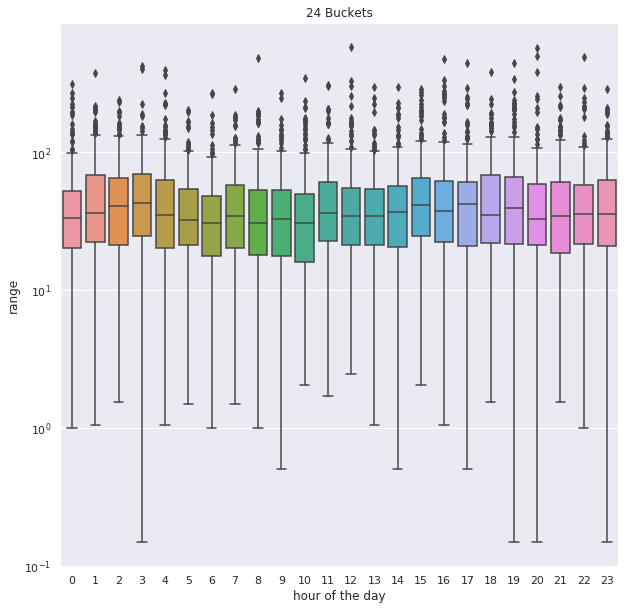

In [0]:
# 24 buckets

n = 24

c = ['hour_{}'.format(i) for i in range(n)]

l = [df['range'].iloc[i::n].reset_index(drop=True) for i in range(n)]

z = zip(c, l)

d = dict(z)

df_buckets = pd.DataFrame(d)
df_buckets = df_buckets[c]

f = plt.figure(figsize=(10,10))
a = sns.boxplot(data=df_buckets)
a.set_title('24 Buckets')
a.set_ylabel('range')
a.set_xlabel('hour of the day')
a.set_yscale('log')
a.set_xticklabels(range(n))

plt.show()

Column __`signed_range`__ formed into 24 buckets each representing a particular hour. This is an hourly data chart so its visualized as a 24hr window. Further ideas are 7 day or 52 week *windows*.

### Summary

__Range__:
- Highest correlation with time step of 1 shift back (i.e. between $X_t$ and $X_{t-1}$.) Correlation is $0.54$
- Highly correlates with __Volume__. Correlation is $0.77$
- Strong right skew.

__Close Logreturns__:
- Do not correlate with volume
- Leptokurtic.
- No apparent relationship between __close log-returns__ across several time-shifts. 

## Estimator API

In [0]:
# define features

features = [
    tf.feature_column.numeric_column('range'),
    tf.feature_column.numeric_column('close_logreturn'),
    tf.feature_column.numeric_column('range_logreturn'),
    tf.feature_column.numeric_column('volume'),
    tf.feature_column.numeric_column('close')
]

In [0]:
# create model


model = tf.estimator.LinearRegressor(features)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp6ji78_km', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f49e6c5dfd0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [0]:
# prep data

def prep_data(drop=-1):
  '''Prepare data for training. Split dataset into features f and the label l.
  drop parameter (by default 1) shifts the dataset and drops rows that get NaNs as the result of the shift.
  '''
  
  ra = df['range'][:drop]
  ra.reset_index(drop=True, inplace=True)
  
  cl = df['close_logreturn'][:drop]
  cl.reset_index(drop=True, inplace=True)
  
  ra_log = df['range_logreturn'][:drop]
  ra_log.reset_index(drop=True, inplace=True)
    
  vol = df['volume'][:drop]
  vol.reset_index(drop=True, inplace=True)
  
  cl = df['close'][:drop]
  cl.reset_index(drop=True, inplace=True)
  
  f = {
      'range': ra,
      'close_logreturn': cl,
      'range_logreturn': ra_log,
      'volume': vol,
      'close': cl
  }
  
  l = df['signed_range'].shift(drop)[:drop]
  l.reset_index(drop=True, inplace=True)
  
  return f, l

test_f, test_l = prep_data()

print(test_f['range'].head())
print('Features length: {}'.format(len(test_f['range'])))
print(test_l.head())
print('Labels length: {}'.format(len(test_l)))

0     47.0
1    102.5
2    121.0
3     80.0
4     61.5
Name: range, dtype: float64
Features length: 5317
0   -102.5
1    121.0
2     80.0
3     61.5
4     45.0
Name: signed_range, dtype: float64
Labels length: 5317


In [0]:
# train model

model.train(prep_data, max_steps=10000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp6ji78_km/model.ckpt-100
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 100 into /tmp/tmp6ji78_km/model.ckpt.
INFO:tensorflow:loss = 24806720.0, step = 101
INFO:tensorflow:global_step/sec: 779.309
INFO:tensorflow:loss = 24804968.0, step = 201 (0.135 sec)
INFO:tensorflow:global_step/sec: 1047.36
INFO:tensorflow:loss = 24803632.0, step = 301 (0.095 sec)
INFO:tensorflow:global_step/sec: 957.16
INFO:tensorflow:loss = 24802586.0, step = 401 (0.107 sec)
INFO:tensorflow:global_step/sec: 508.388
INFO:tensorflow:loss = 24801764.0, step = 501 (0.189 sec)
INFO:tensorflow:global_step/sec: 1085.04
INFO:tensorflow:loss = 24801096.0, step = 601 (0.092 sec)
INFO:tensorflow:global_step/sec: 1030.79
INFO:tensorflow:loss = 24800590